# Инжиниринг категориальных признаков

# Из методички

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

**Первоначальное знакомство с данными**

In [59]:
t_data = pd.read_csv("titanic.csv")
t_data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,first,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,first,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,third,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    object 
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [61]:
t_data.describe()

,Unnamed: 0,PassengerId,Survived,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
cs_data = pd.read_csv("Customer_support_data.csv")
cs_data.head()

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


В датасете большое количество категориальных атрибутов. Еще присутствуют даты и пара численных колонок, но с ними мы не будем разбираться в этой работе. При этом целевая переменная - оценка удовлетворенности - является численной. То есть перед нами датасет для задачи регрессии.

In [63]:
cs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

Основная информация о колонках показывает, что в датасете есть большое количество пропусков.

После визуального ознакомления с данными нужно вывести статистику по всем столбцам, для чего в describe нужно указать параметр include='all', так как по умолчанию она описывает только численные.

In [64]:
cs_data.describe(include="all")

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
count,85907,85907,85907,85907,28742,67675,17214,85907,85907,85907,17079,17196,17206.000000,242.000000,85907,85907,85907,85907,85907,85907.000000
unique,85907,3,12,57,18231,67675,13766,30923,30262,31,1782,9,NaN,NaN,1371,40,6,5,5,NaN
top,07c7a878-0d5a-42e0-97ef-de59abec0238,Inbound,Returns,Reverse Pickup Enquiry,Good,3230db30-f8da-4c44-8636-ec76d1d3d4f3,09/08/2023 11:55,13/08/2023 10:40,28/08/2023 00:00,28-Aug-23,HYDERABAD,Electronics,NaN,NaN,Wendy Taylor,Carter Park,John Smith,>90,Morning,NaN
freq,1,68142,44097,22389,1390,1,7,13,3378,3452,722,4706,NaN,NaN,429,4273,25261,30660,41426,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5660.774846,462.400826,NaN,NaN,NaN,NaN,NaN,4.242157
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12825.728411,246.295037,NaN,NaN,NaN,NaN,NaN,1.378903
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,392.000000,293.000000,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.000000,427.000000,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2699.750000,592.250000,NaN,NaN,NaN,NaN,NaN,5.000000


In [65]:
t_data.describe(exclude=[np.number]) # только категориальные атрибуты

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,3,891,2,681,147,3
top,third,"Dooley, Mr. Patrick",male,347082,G6,S
freq,491,1,577,7,4,644


**Визуализация распределения атрибутов и связь с целевой переменной**

Для визуализации распределения категориальных атрибутов воспользуемся самым простым инструментом - гистограммой.

<Axes: xlabel='channel_name', ylabel='Count'>

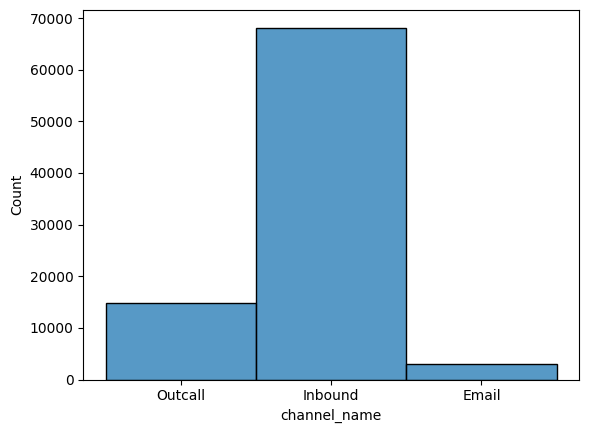

In [66]:
sns.histplot(data=cs_data, x="channel_name")

Это уже информацию можно вывести в табличном виде.

In [67]:
cs_data.channel_name.value_counts()

,count
channel_name,
Inbound,68142
Outcall,14742
Email,3023


Сразу же построим совместное распределение данного признака и целевой переменной. Так как признак категориальный, а целевая переменная - численная, мы можем построить на столбчатой диаграмме среднее значение целевой переменной для каждой категории.

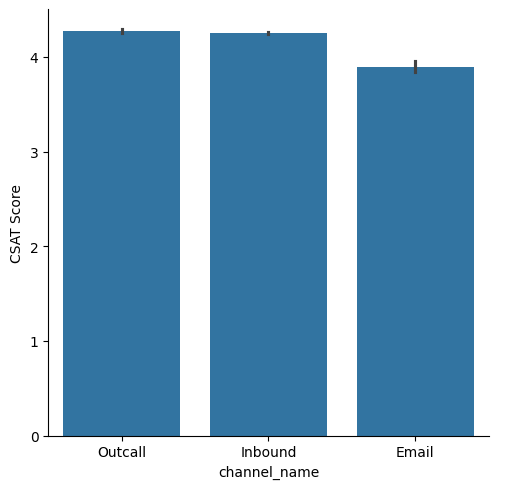

In [68]:
sns.catplot(data=cs_data, x="channel_name", y="CSAT Score", kind="bar")

На графике видно, что средние значения для первый двух категорий отличаются несущественно, а по третьей - сильно ниже. Можно сделать вывод, что канал обращения влияет на потенциальную удовлетворенность клиента и обращения по электронной почте в среднем немного меньше нравятся клиентам.

Если категорий очень много, таблицу значений читать проще, так как можно ограничиться анализом только самых распространенных значений. В данном случае значений не так много и можно построить гистограмму. Но мы построим ее по упорядоченному набору значений.

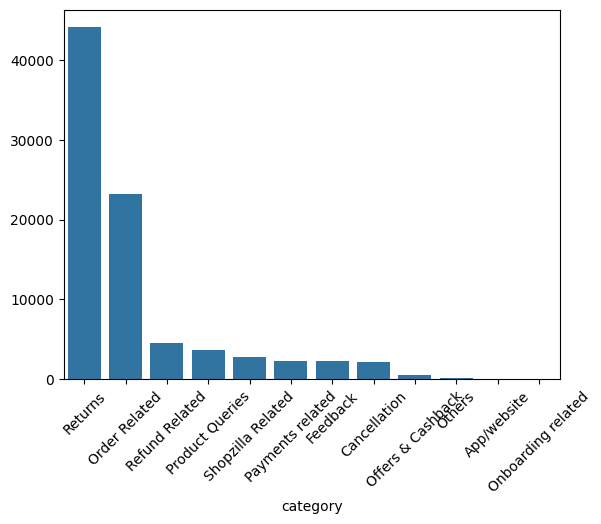

In [69]:
counts = cs_data.category.value_counts()
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

В данном случае, наблюдается типичный для таких распределений дисбаланс категорий. Присутствуют очень малочисленные категории. В таких случая стоит подумать над объединением категорий. Хотя представленный на графике случай еще далеко не самый экстремальный.

Теперь визуализируем распределения признаков.

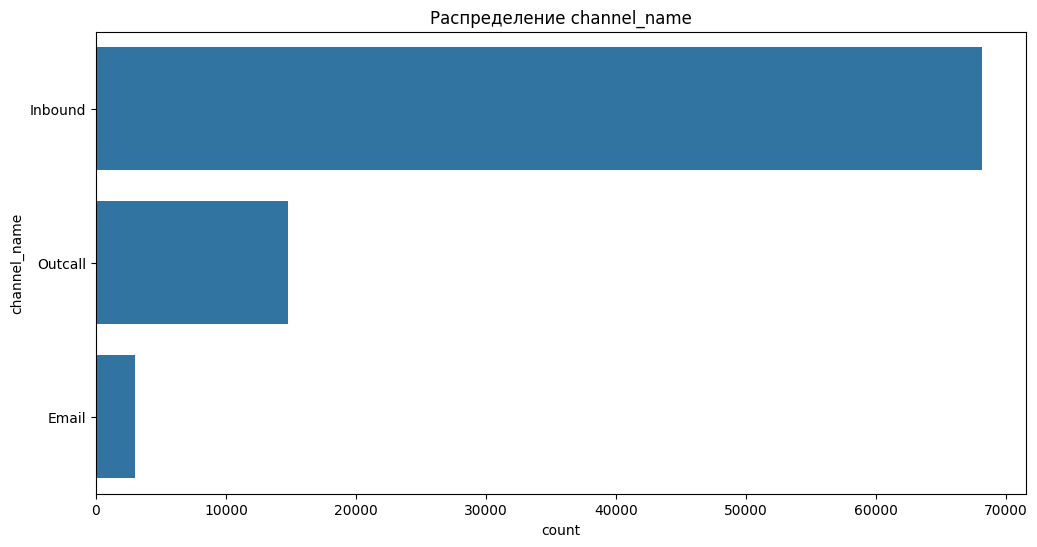

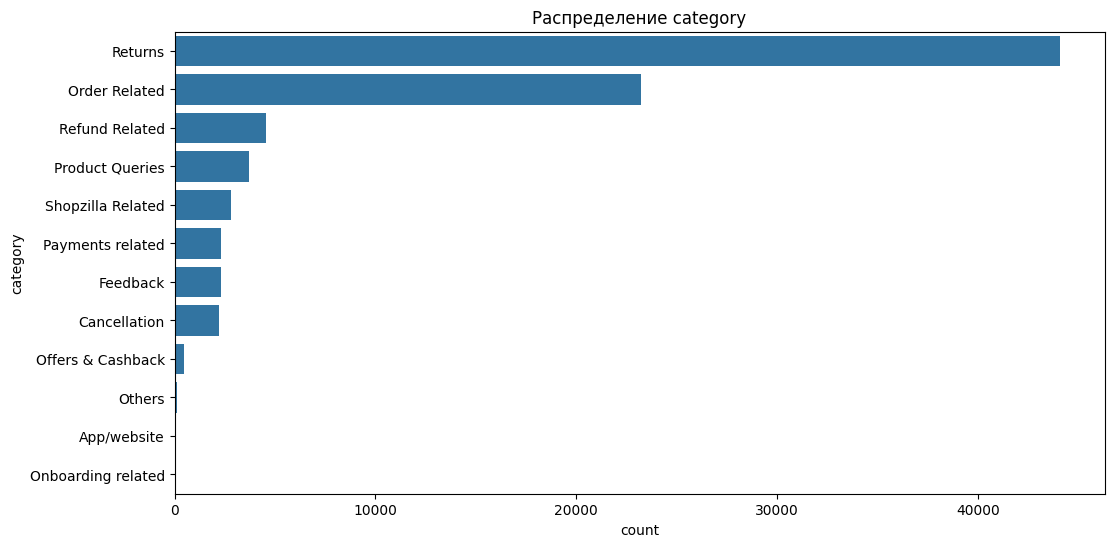

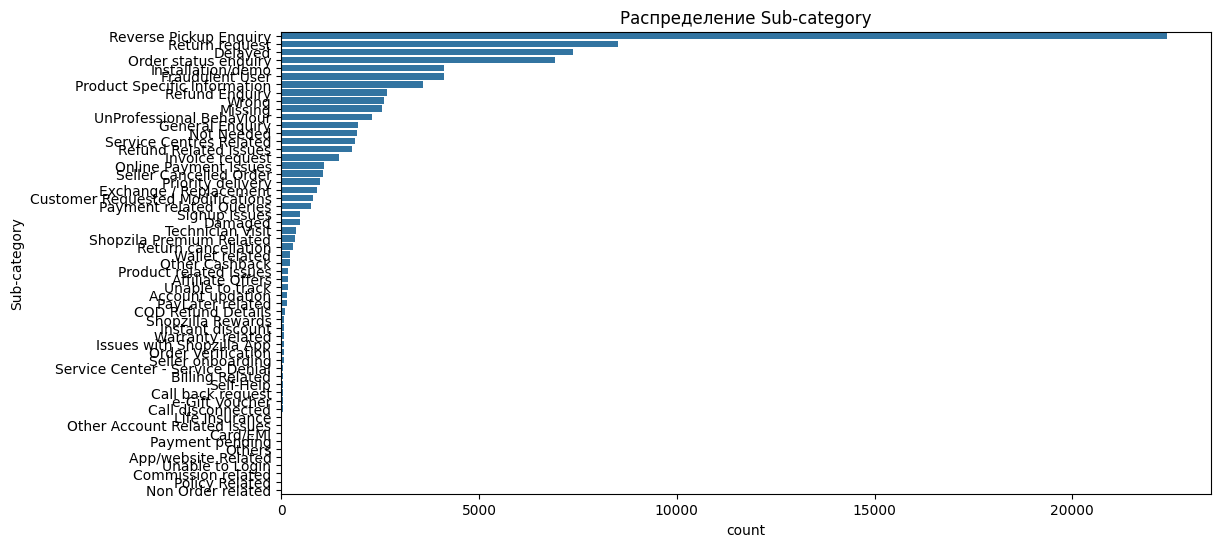

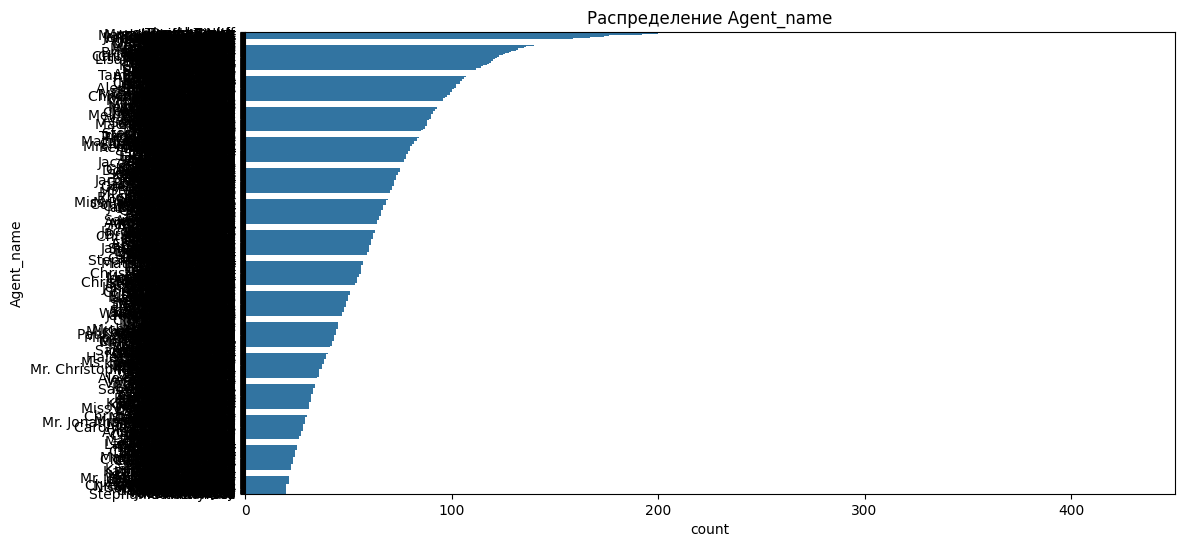

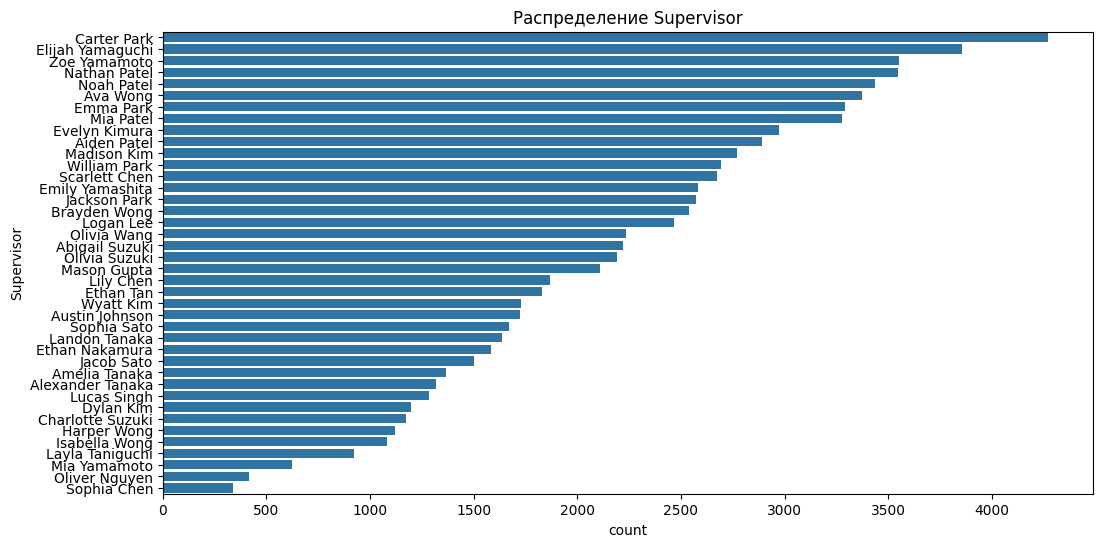

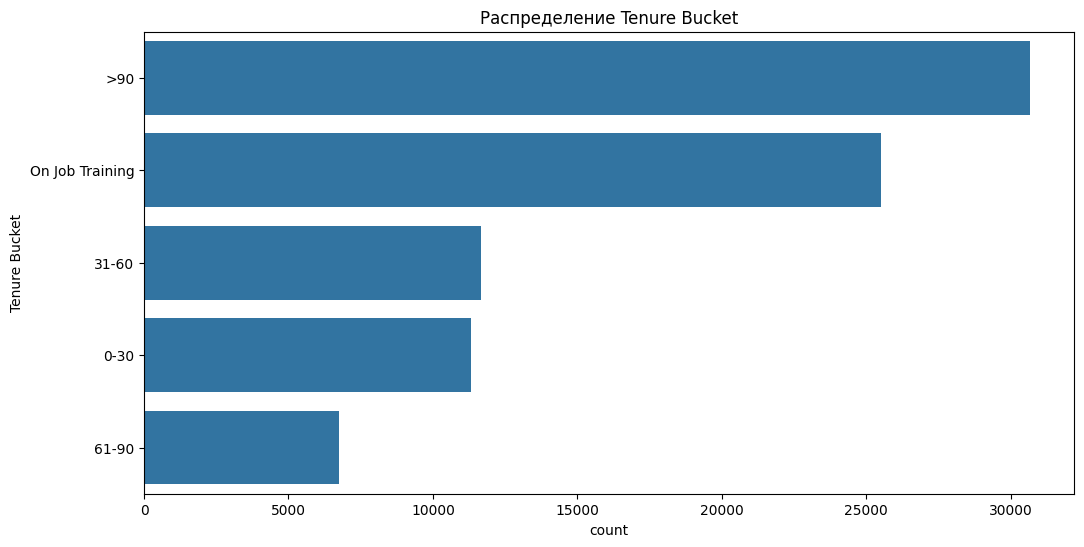

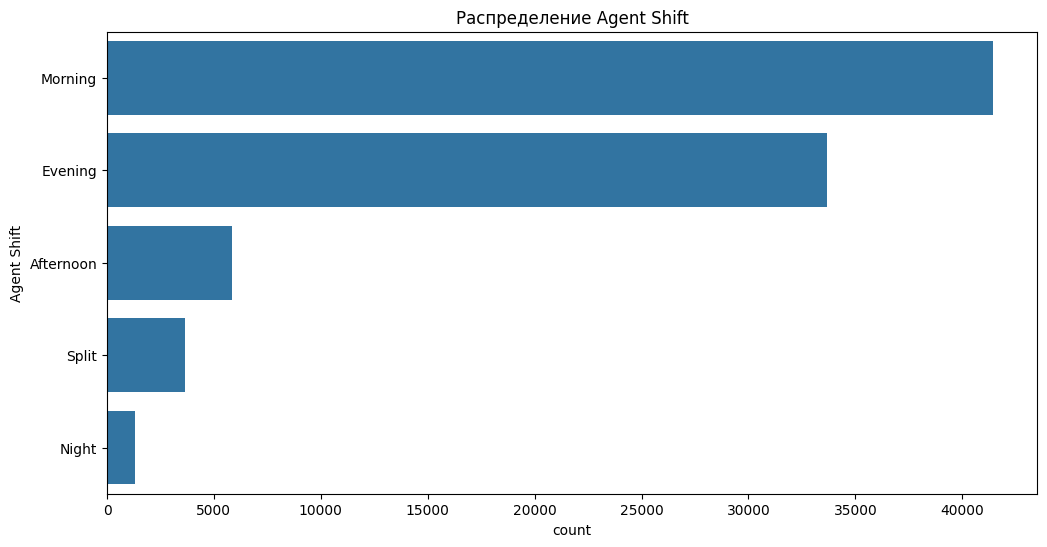

In [70]:
categorical_columns = ['channel_name', 'category', 'Sub-category',  'Agent_name', 'Supervisor', 'Tenure Bucket', 'Agent Shift']

for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=cs_data[col], order=cs_data[col].value_counts().index)
    plt.title(f"Распределение {col}")
    plt.show()

Теперь выведем среднее значение удовлетворенности в зависимости от значения признака.

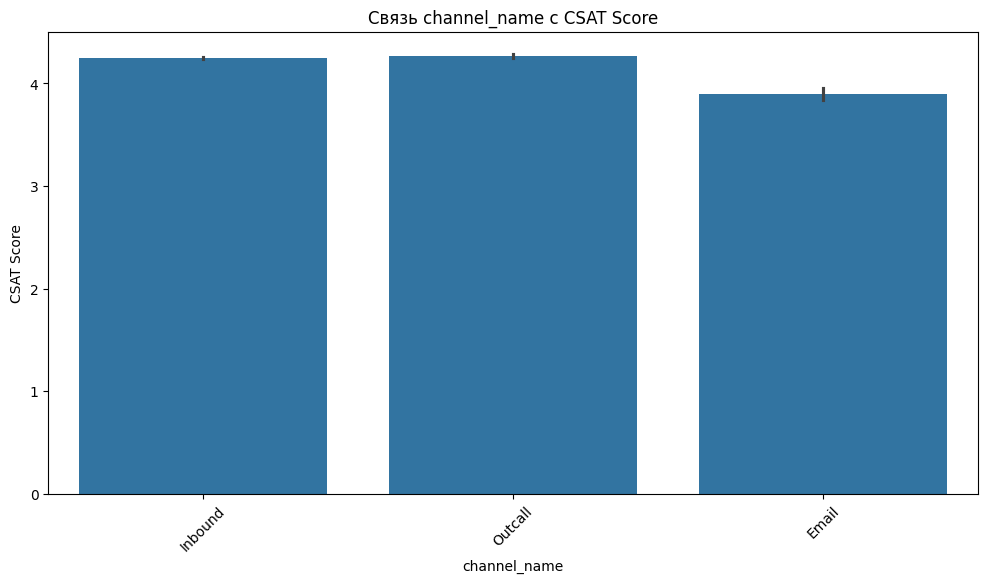

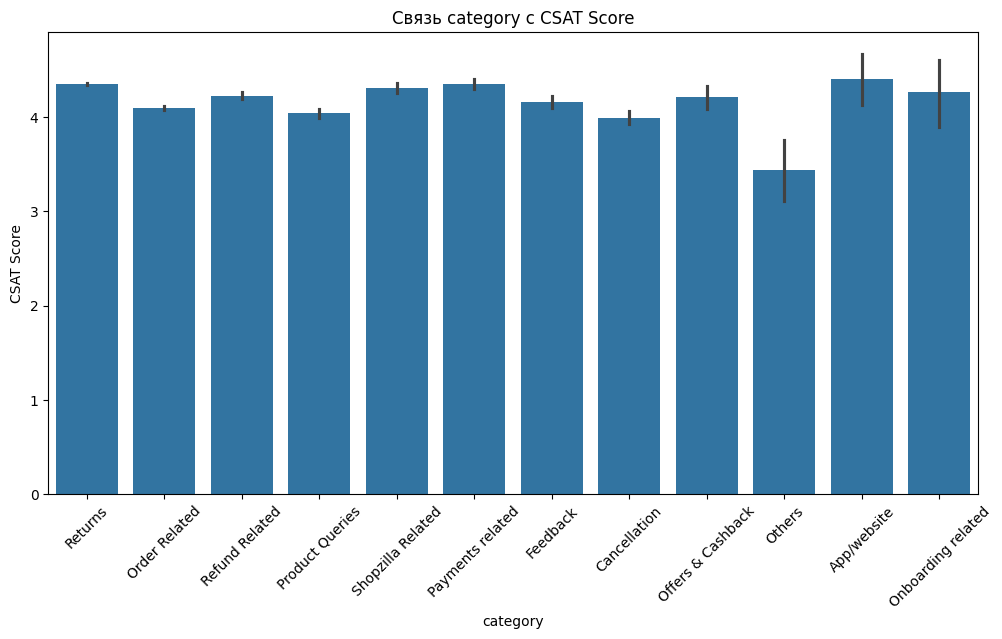

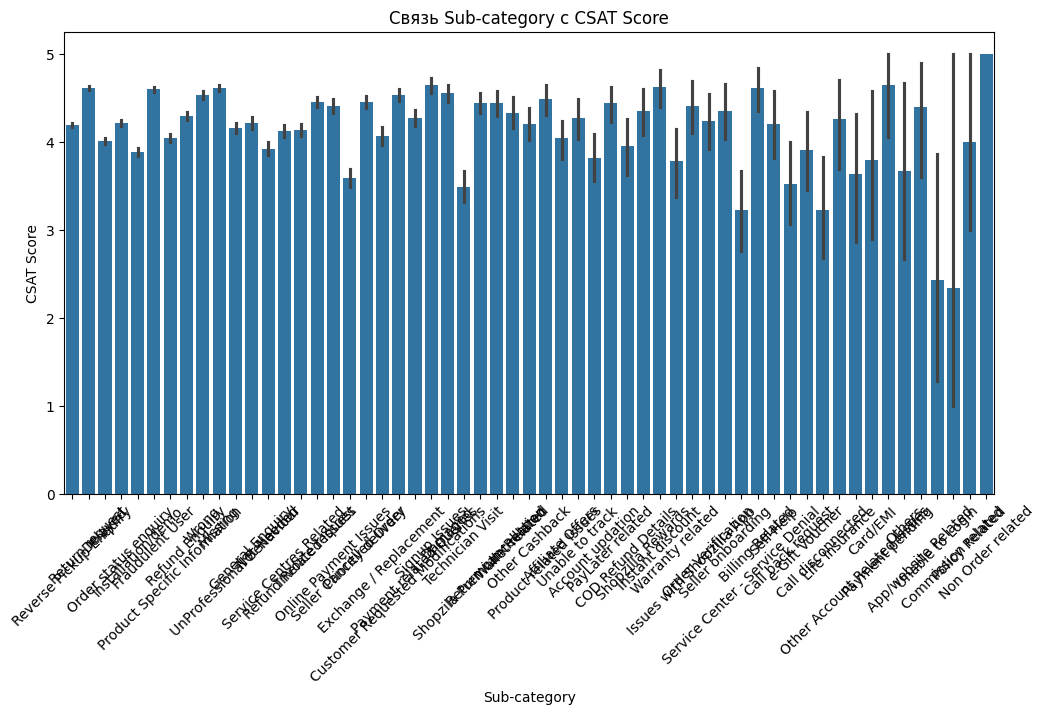

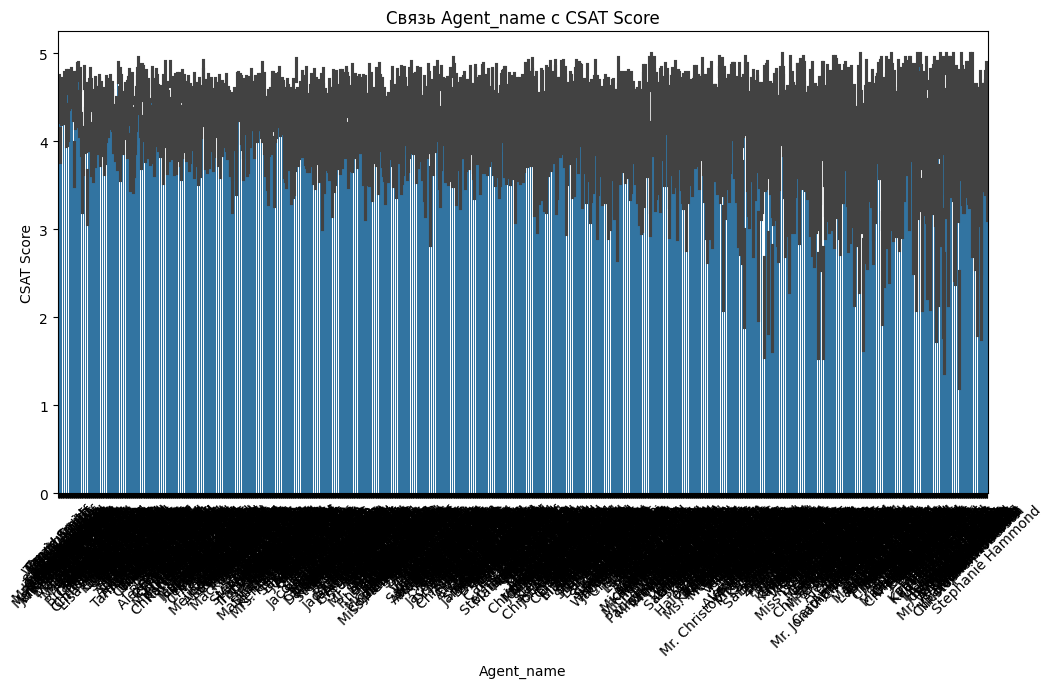

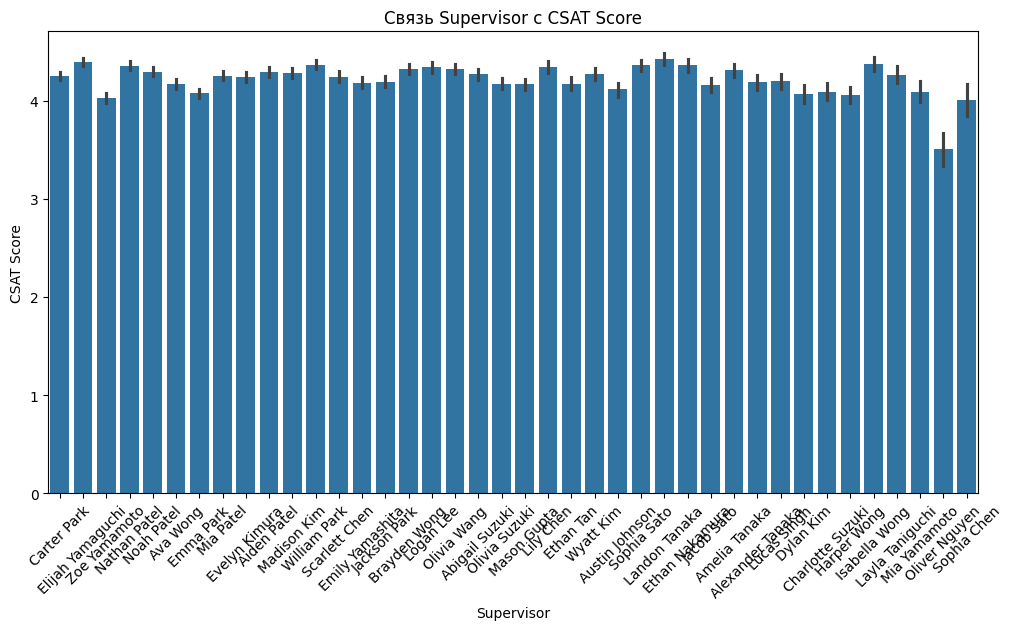

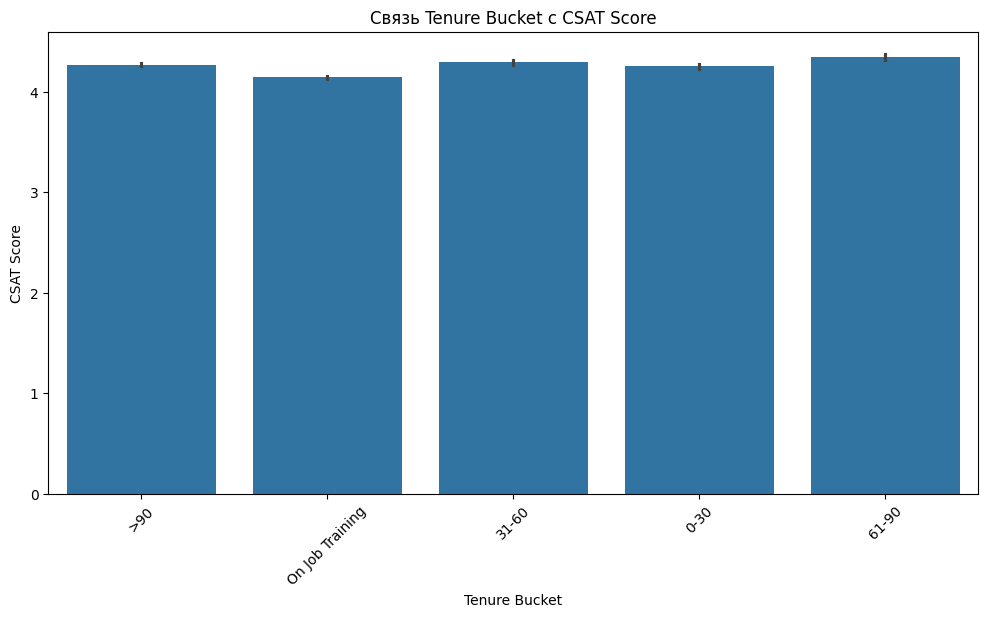

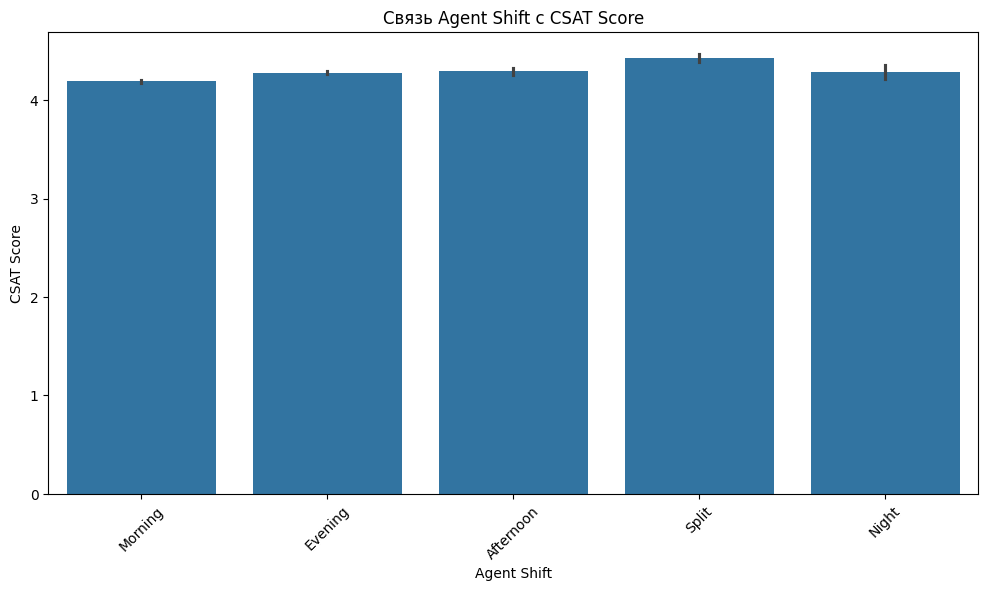

In [71]:
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    sns.barplot(x=cs_data[col], y=cs_data["CSAT Score"], order=cs_data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Связь {col} с CSAT Score")
    plt.show()

**Укрупнение категорий**

При кодировании категориальных данных методом One-Hot с большим числом значений получается много столбцов, что может привести к переобучению и снижению эффективности. Чтобы избежать этого, можно объединить близкие категории. Например, для отзывов клиентов можно бинаризировать атрибут: 1 — если отзыв есть (положительный), 0 — если нет.

In [72]:
cs_data["Customer Remarks New"] = (cs_data["Customer Remarks"].str.len() > 3).astype(int)

Точно также можно бинаризировать и наличие заказа

In [73]:
cs_data["Is_order"] = (cs_data["Order_id"].isna()).astype(int)

А вот с другими категориальными переменным так просто уже не поступишь. Например, подкатегория обращения. Здесь мы видим большое количество малопопулярных значений. Часто в такой ситуации можно объединить редкие значения в одно, "Иное". Можно сделать это, например, так.

In [74]:
cs_data.loc[~cs_data["Sub-category"].isin([
    "Reverse Pickup Enquiry", "Return request", "Delayed", "Order status enquiry",
    "Installation/demo", "Fraudulent User", "Product Specific Information"
    ]), "Sub-category"] = "Other"

**Добавление агрегированной информации**

Можно вывести информацию о количестве записей в колонке, сгруппированных по имени оператора.

In [75]:
cs_data.groupby(["Agent_name"]).agg({'Agent_name': 'count'})

,Agent_name
Agent_name,
Aaron Edwards,93
Aaron Romero,59
Abigail Gonzalez,25
Adam Barnett,56
Adam Hammond,60
...,...
Yesenia Bowers,50
Zachary Collins,75
Zachary Ford,62


А для того, чтобы добавить колонку с количеством клиентов у соответствующего операторам можно вот так скомбинировать несколько функций pandas.

In [76]:
cs_data['Agent_count'] = cs_data.groupby(["Agent_name"])["Agent_name"].transform('count')

Точно так же можно поступить и с количеством операторов у одного руководителя. Но теперь нам понадобится другая агрегирующая функция, так как значения имени оператора могут повторяться.

In [77]:
cs_data.groupby(["Supervisor"]).agg({'Agent_name': 'nunique'})

,Agent_name
Supervisor,
Abigail Suzuki,38
Aiden Patel,41
Alexander Tanaka,15
Amelia Tanaka,19
Austin Johnson,29
Ava Wong,70
Brayden Wong,45
Carter Park,64
Charlotte Suzuki,22


По аналогии можем добавить эту информацию к исходному датасету.

In [78]:
cs_data['Sups_no_agents'] = cs_data.groupby(["Supervisor"])["Agent_name"].transform('nunique')

**Заполнение отсутствующих значений**

В отличие от численных атрибутов, заполнение пропусков в категориальных переменных значительно проще. В большинстве случаев наиболее адекватным будет заполнение неизвестных значений специальным.

In [79]:
cs_data['Product_category'] = cs_data['Product_category'].fillna('unknown')

In [80]:
cs_data['connected_handling_time'] = cs_data['connected_handling_time'].fillna('0')

**Преобразование бинарных атрибутов**

Начнем с самого простого типа категориальных атрибутов - бинарных. Их можно преобразовывать как угодно. Самый компактный способ - LabelEncoder.

In [81]:
from sklearn.preprocessing import LabelEncoder
LE_sex = LabelEncoder()
t_data.Sex = LE_sex.fit_transform(t_data.Sex)

Этот способ кодирования просто заменяет значения атрибута на последовательные целые числа. В данном случае, 0 или 1 в произвольном порядке.

**Преобразование порядковых атрибутов**

In [82]:
t_data.Pclass.replace({
    'first': 1, 'second': 2, 'third': 3
}, inplace=True)

<ipython-input-82-586bca14f1e5>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  t_data.Pclass.replace({
<ipython-input-82-586bca14f1e5>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  t_data.Pclass.replace({


**Преобразование номинальных атрибутов**

Номинальные атрибуты, к которым относится большинство категориальных, можно преобразовывать только с использованием OneHotEncoder. Этот способ кодирования следует выбирать в случае сомнений в типе шкалы атрибута.

In [83]:
from sklearn.preprocessing import OneHotEncoder
OH_embarked = OneHotEncoder(sparse_output=False)
OH_embarked.fit_transform(t_data[['Embarked']])

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

Для формирования таблицы с преобразованными данными нам понадобится сформировать список названий колонок.

In [84]:
OH_embarked.get_feature_names_out(['Embarked'])

array(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Embarked_nan'],
      dtype=object)

Эту информацию мы передаем конструкторы датафреймов в качестве названий столбцов и так формируем преобразованные данные.

In [85]:
dummies = pd.DataFrame(OH_embarked.fit_transform(t_data[['Embarked']]),
                       columns=OH_embarked.get_feature_names_out(['Embarked']),
                       index = t_data.index)

In [86]:
T_dummies = pd.concat([t_data, dummies]).drop(["Embarked"], axis=1)

**Удаление лишних столбцов и массовое преобразование**

Необходимо сначала удалить из датасета все ненужные колонки, особенно категориальные. После преобразования это будет сделать уже не так просто. Мы сейчас удалим все лишние атрибуты произвольно. На практике для этого можно использовать анализ значимости атрибутов.

In [87]:
cs_data.drop(["Unique id", "Order_id", "order_date_time", "issue_responded", "Issue_reported at", "Survey_response_Date"], axis=1, inplace=True)

In [88]:
for col in cs_data.columns:
    vc = cs_data[col].value_counts()
    if 'Unknown' in vc:
        count_unknown = vc['Unknown']
        total = vc.sum()
        percent = count_unknown / total * 100
        print(f"Unknown in {col}: {count_unknown}, {percent:.2f}% of col")


In [89]:
cs_data.drop(["Customer Remarks", "Customer_City", "Product_category", "Item_price", "connected_handling_time"], axis=1, inplace=True)

In [90]:
cs_data = pd.get_dummies(cs_data)

In [91]:
cs_data.head()

,CSAT Score,Customer Remarks New,Is_order,Agent_count,Sups_no_agents,channel_name_Email,channel_name_Inbound,channel_name_Outcall,category_App/website,category_Cancellation,...,Tenure Bucket_0-30,Tenure Bucket_31-60,Tenure Bucket_61-90,Tenure Bucket_>90,Tenure Bucket_On Job Training,Agent Shift_Afternoon,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split
0,5,0,0,42,41,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
1,5,0,0,32,17,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2,5,0,0,35,46,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
3,5,0,0,48,28,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,5,0,0,124,29,False,True,False,False,True,...,True,False,False,False,False,False,False,True,False,False


# Задания для самостоятельного выполнения

*1. Постройте визуализацию распределения признаков и совместного распределения признаков и целевой переменной с помощью тепловых карт. Попробуйте использовать другие инструменты визуализации.*

In [92]:
def visualize_features_and_target(df, target_col):
    df = df.replace(-1, np.nan)

    numeric_features = df.select_dtypes(include=[np.number]).columns.drop(target_col)
    df = df.dropna(subset=[target_col] + list(numeric_features))

    for feature in numeric_features:
        # проверка на валидность данных
        if df[feature].dropna().empty:
            print(f"Пропускаем {feature} — нет валидных данных для распределения")
            continue

        plt.figure(figsize=(8,4))
        sns.histplot(df[feature], bins=30, kde=True)
        plt.title(f'Распределение признака {feature}')
        plt.show()

    for feature in numeric_features:
        if df[feature].dropna().empty or df[target_col].dropna().empty:
            print(f"Пропускаем {feature} — нет валидных данных для тепловой карты")
            continue

        try:
            heatmap_data, xedges, yedges = np.histogram2d(df[feature], df[target_col], bins=30)
            plt.figure(figsize=(8,6))
            sns.heatmap(heatmap_data.T, cmap='YlGnBu', cbar=True,
                        xticklabels=np.round(xedges,2), yticklabels=np.round(yedges,2))
            plt.xlabel(feature)
            plt.ylabel(target_col)
            plt.title(f'2D распределение {feature} и {target_col} (тепловая карта)')
            plt.show()
        except ValueError as e:
            print(f"Ошибка при построении тепловой карты для {feature}: {e}") # для случая если попадают только NaN данные


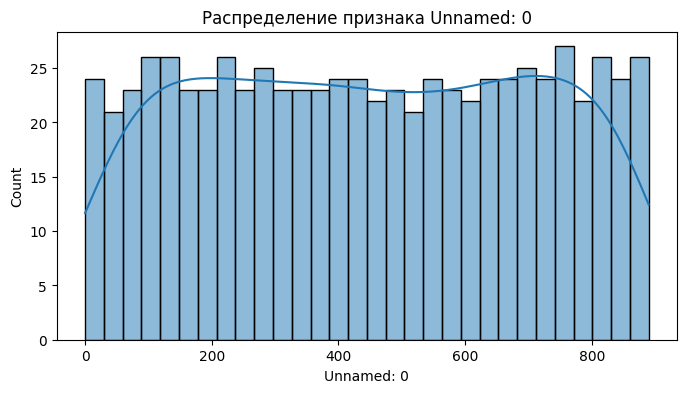

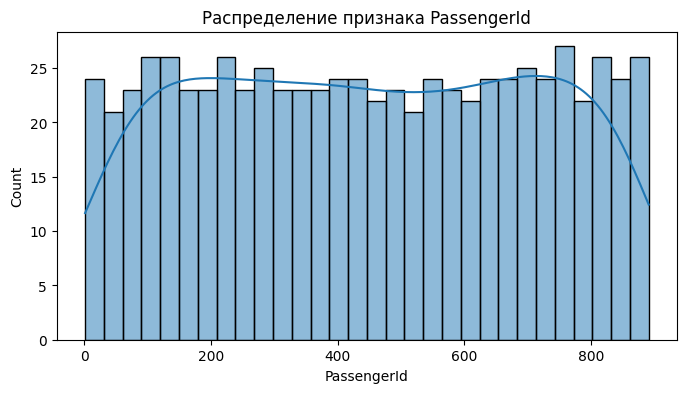

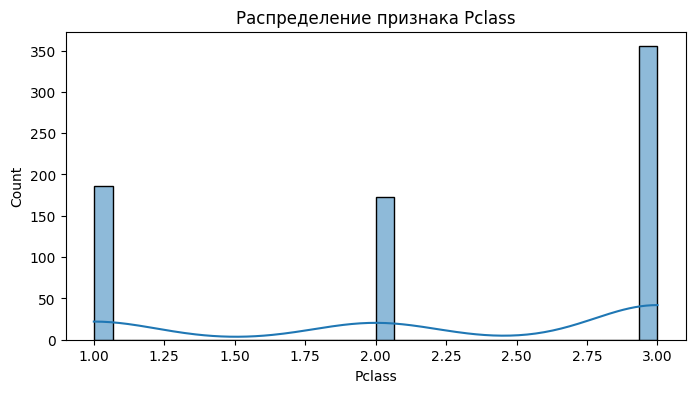

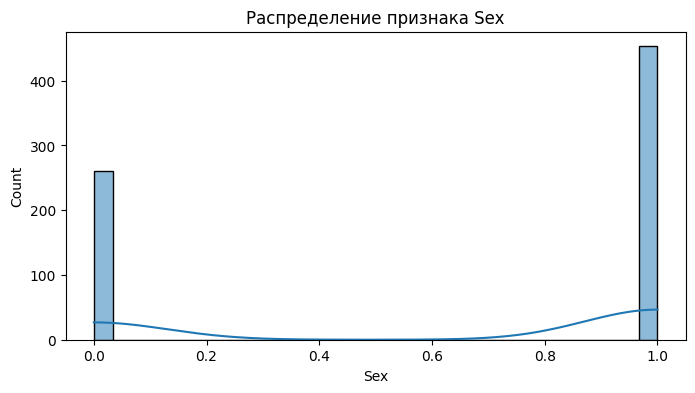

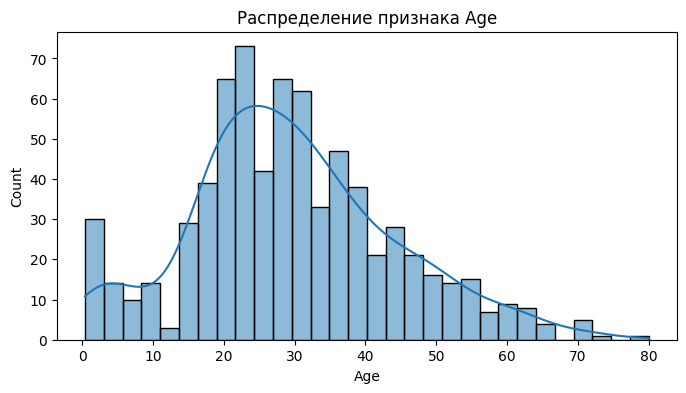

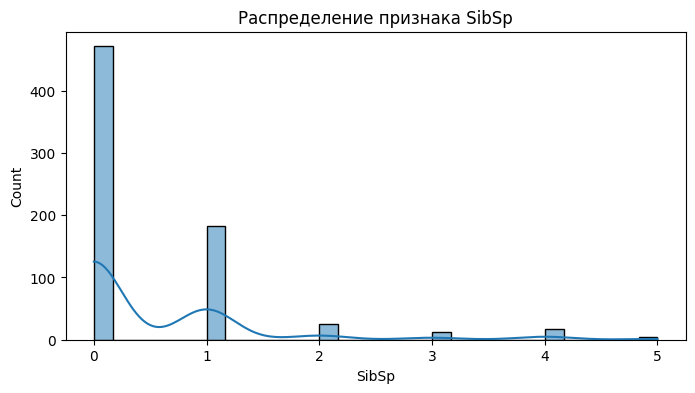

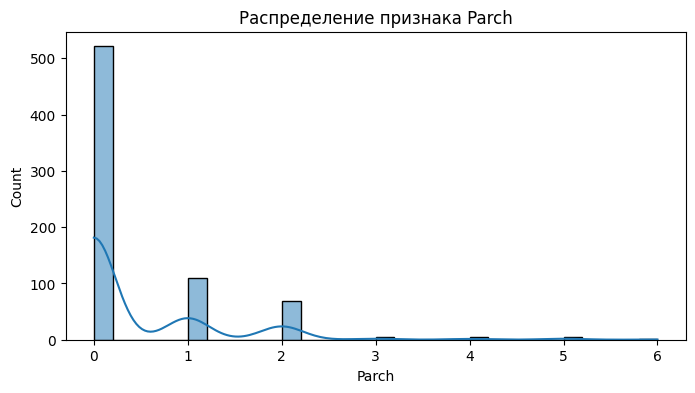

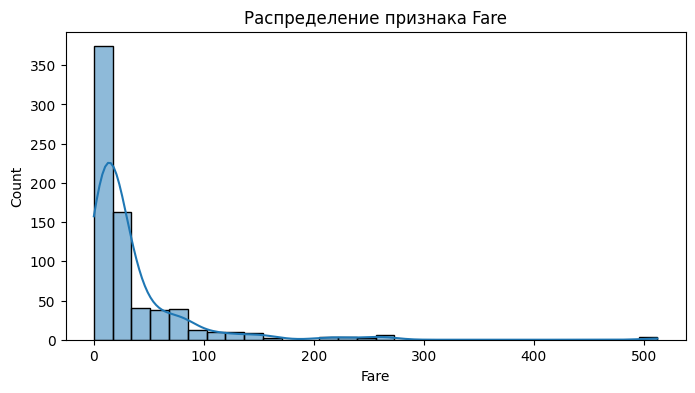

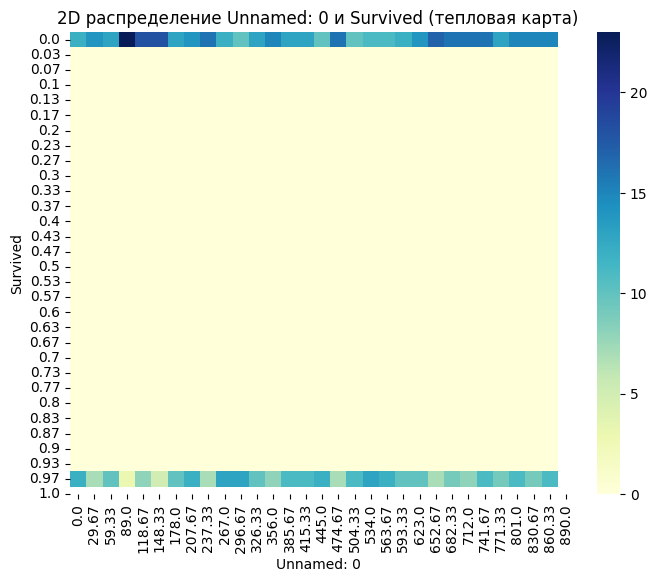

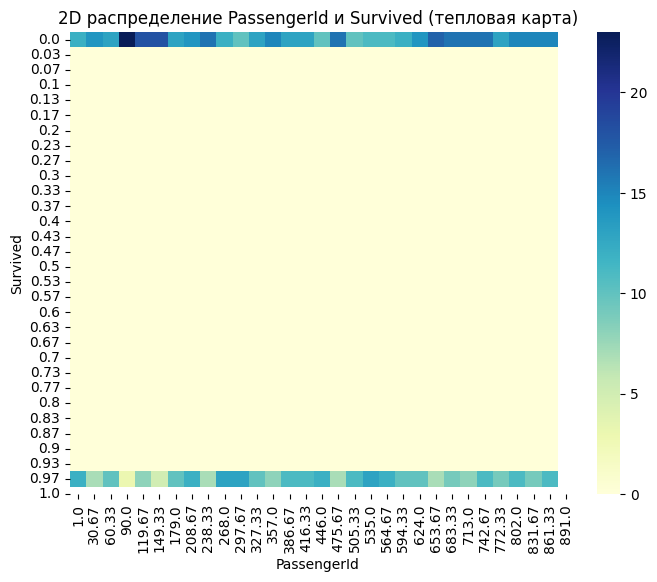

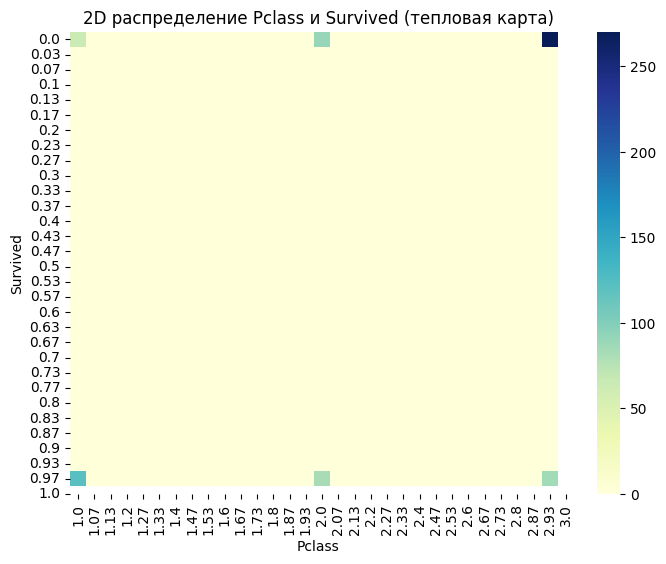

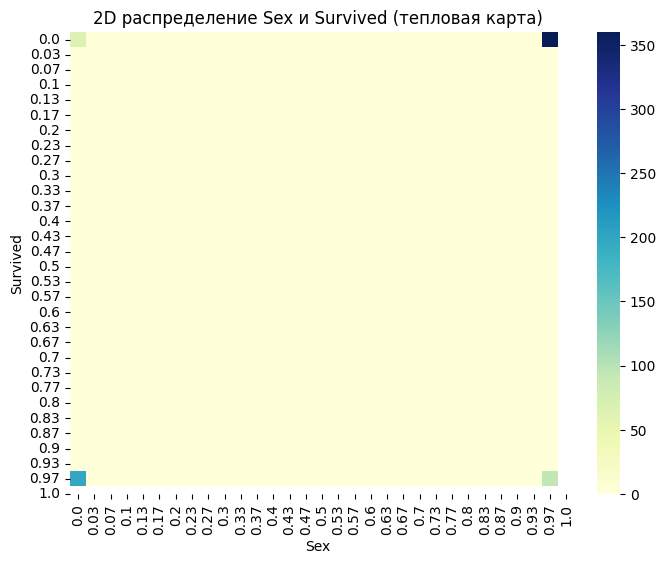

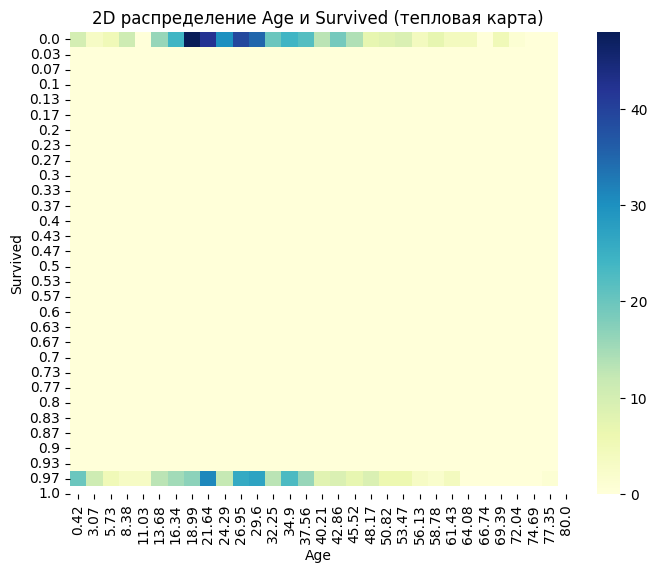

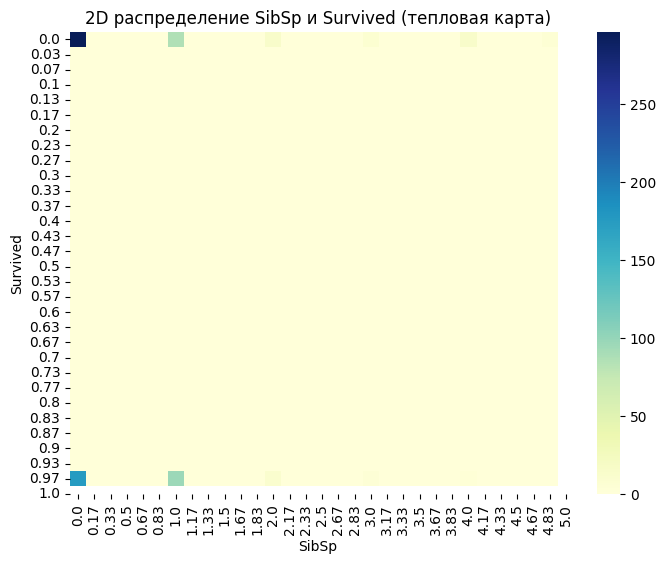

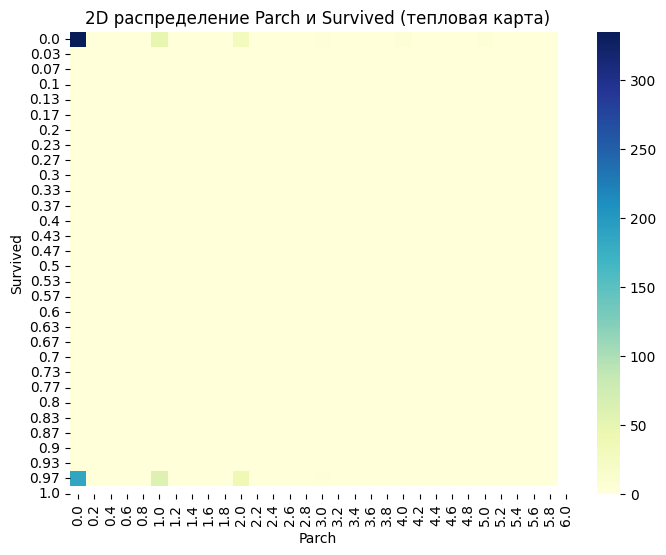

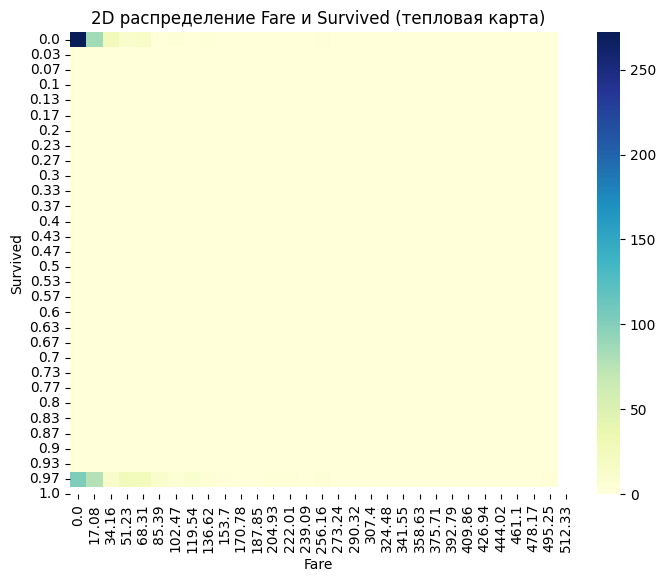

In [93]:
visualize_features_and_target(t_data, target_col='Survived')

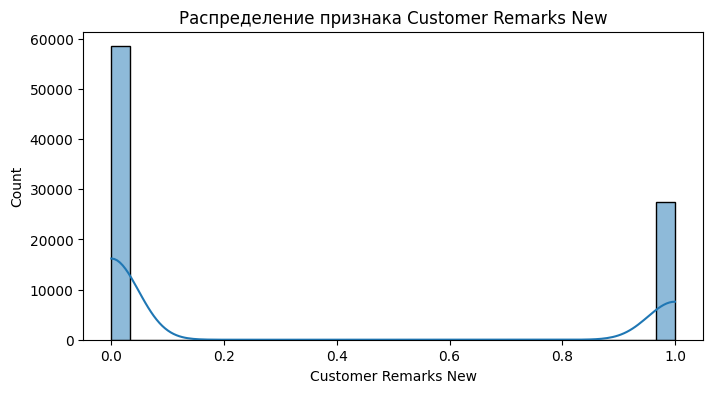

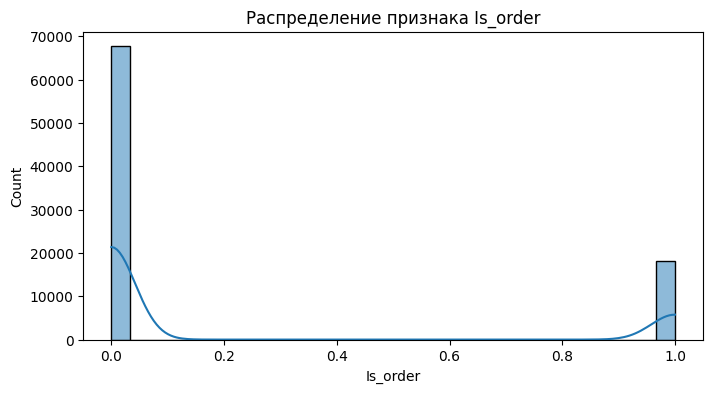

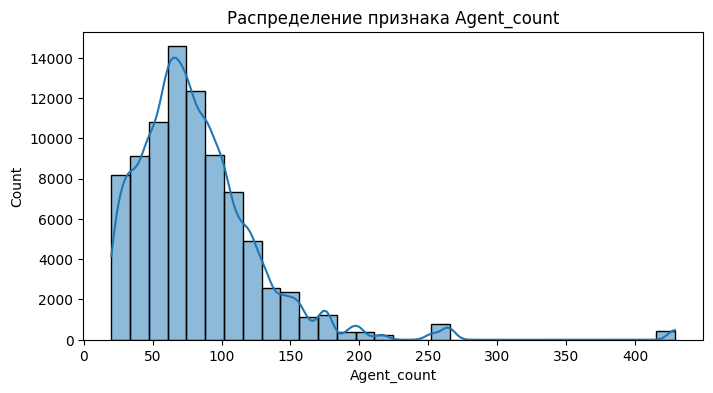

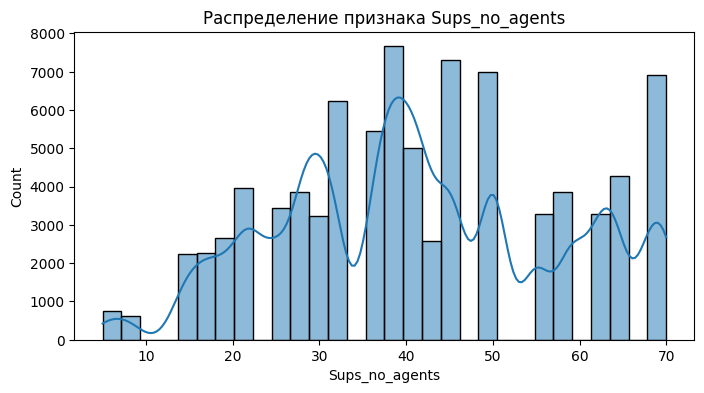

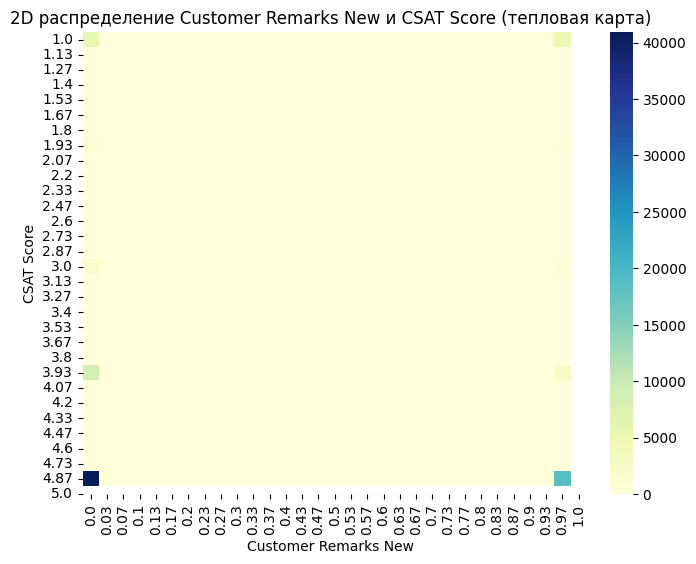

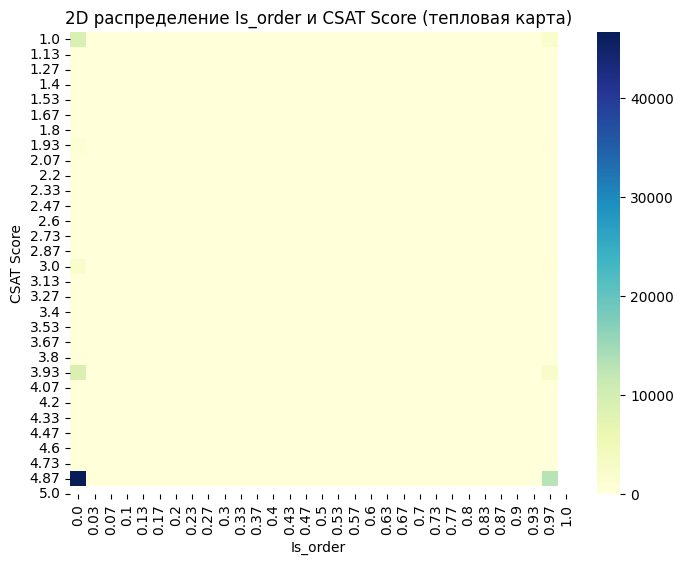

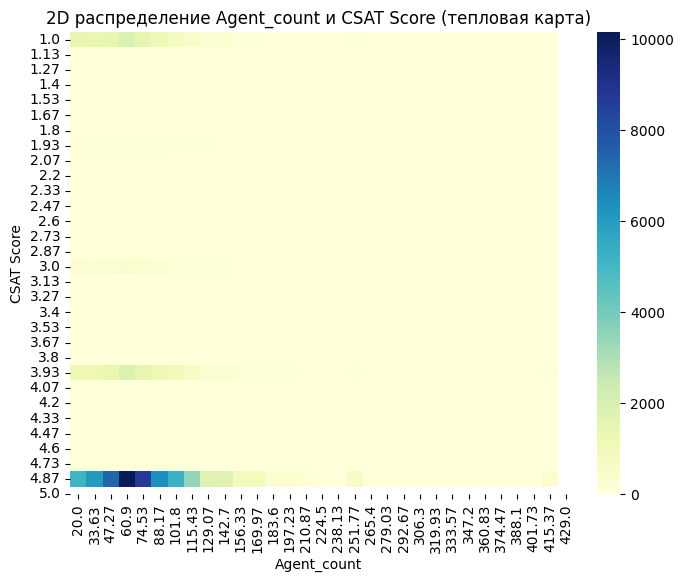

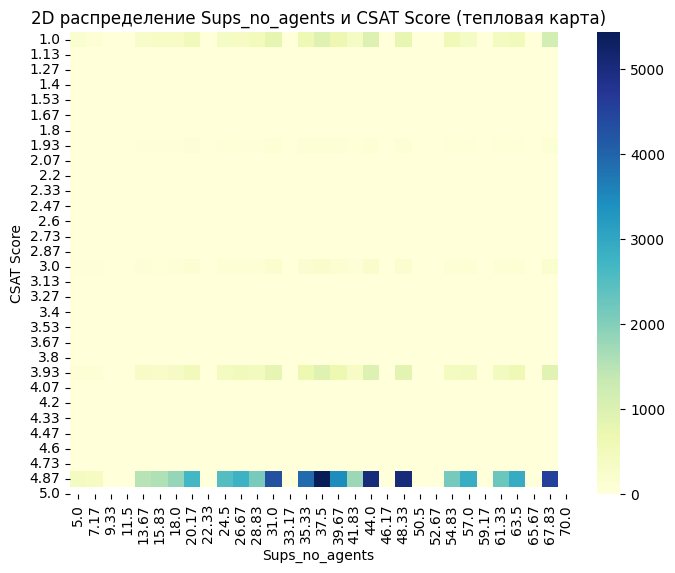

In [94]:
visualize_features_and_target(cs_data, target_col='CSAT Score')

*2. Постройте на получившимся датасете Customer support модель дерева решений и проанализируйте важность признаков. Сделайте вывод об адекватности наших предположений.*

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [96]:
X_train, X_test, y_train, y_test = train_test_split(cs_data.drop("CSAT Score", axis=1), cs_data["CSAT Score"], test_size=0.2, random_state=42)

In [97]:
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [98]:
y_pred = clf.predict(X_test)

In [99]:
accuracy_score(y_test, y_pred)

0.6937492724944709

Результат не плохой, примерно 69% правильных предсказаний модели на тестовой выборке.

3. Проведите полный анализ на датасете Титаник, включая все необходимые визуализации и выводы.

In [100]:
t_data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [101]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    int64  
 6   Age          714 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


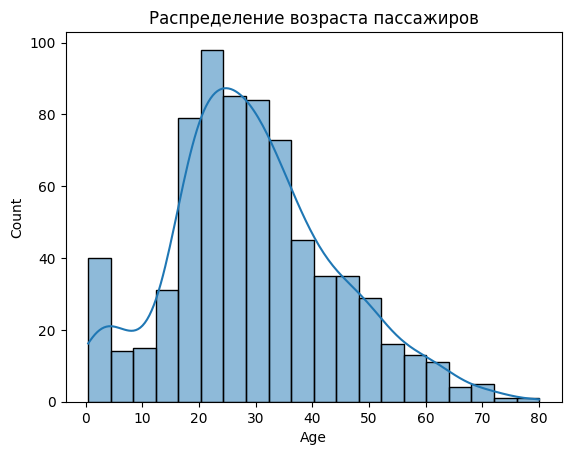

In [102]:
t_data['Age'] = t_data['Age'].replace("Unknown", 0)
sns.histplot(t_data["Age"], kde=True)
plt.title("Распределение возраста пассажиров")
plt.show()

Распределение возраста пассажиров показывает, что большинство находилось в диапазоне 20-40 лет, что типично для пассажирских судов. Детей и подростков (0-20 лет) значительно меньше, а пожилых людей (60+) совсем немного. Пик приходится на молодых взрослых около 30 лет.

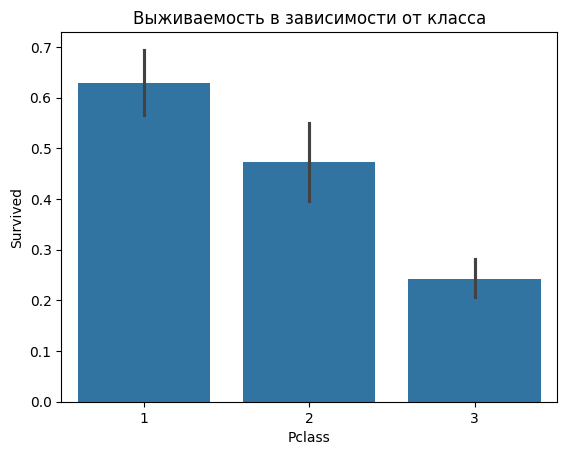

In [105]:
sns.barplot(x="Pclass", y="Survived", data=t_data)
plt.title("Выживаемость в зависимости от класса")
plt.show()

Выживаемость пассажиров напрямую зависела от класса: в первом классе она была самой высокой (около 0.7), во втором — умеренной (0.5), а в третьем — минимальной (0.2).

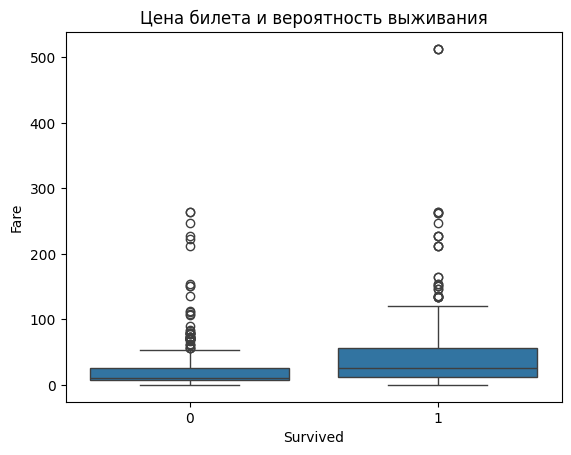

In [106]:
sns.boxplot(x="Survived", y="Fare", data=t_data)
plt.title("Цена билета и вероятность выживания")
plt.show()

Чем выше цена билета (Fare), тем больше вероятность выживания (Survived). Пассажиры с дорогими билетами (300-500) выживали чаще, чем те, у кого билеты были дешевле (0-100).

*4. Проверьте целесообразность каждого необязательного преобразования данных путем проверки, увеличивает ли данное преобразование точность модели.*

In [107]:
X_processed = cs_data.drop("CSAT Score", axis=1)
y_processed = cs_data["CSAT Score"]
X_train_proc, X_test_proc, y_train_proc, y_test_proc = train_test_split(X_processed, y_processed, test_size=0.2, random_state=42)
clf.fit(X_train_proc, y_train_proc)
y_pred_proc = clf.predict(X_test_proc)
print("Accuracy после обработки:", accuracy_score(y_test_proc, y_pred_proc))

Accuracy после обработки: 0.6937492724944709


*5. Создайте воспроизводимый код обработки данного датасета.*

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def load_data():
    cs_data = pd.read_csv("Customer_support_data.csv")
    titanic_data = pd.read_csv("titanic.csv")
    return cs_data, titanic_data

def preprocess_customer_support(cs_data):
    cs_data.fillna('Unknown', inplace=True)

    cs_data["Customer_Remarks_New"] = (cs_data["Customer Remarks"].str.len() > 3).astype(int)
    cs_data["Is_order"] = cs_data["Order_id"].notna().astype(int)

    rare_categories = cs_data["Sub-category"].value_counts()[cs_data["Sub-category"].value_counts() < 5000].index
    cs_data["Sub-category"] = cs_data["Sub-category"].replace(rare_categories, "Other")

    cs_data['Agent_case_count'] = cs_data.groupby("Agent_name")["Agent_name"].transform('count')

    cs_data.drop(["Unique id", "Order_id", "order_date_time", "Issue_reported at", "Survey_response_Date", "Customer Remarks", "Customer_City", "Product_category", "Item_price", "connected_handling_time"], axis=1, inplace=True)

    cs_data = pd.get_dummies(cs_data)

    return cs_data

def preprocess_titanic(titanic_data):
    titanic_data.fillna('Unknown', inplace=True)

    le = LabelEncoder()
    titanic_data["Sex"] = le.fit_transform(titanic_data["Sex"])
    titanic_data = pd.get_dummies(titanic_data, columns=["Embarked", "Pclass"])

    return titanic_data

def main():
    cs_data, titanic_data = load_data()
    cs_data = preprocess_customer_support(cs_data)
    titanic_data = preprocess_titanic(titanic_data)

    print("Customer Support Data Processed:")
    print(cs_data.head())
    print("\nTitanic Data Processed:")
    print(titanic_data.head())

In [113]:
if __name__ == "__main__":
    main()

<ipython-input-112-2ae6de68b934>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  cs_data.fillna('Unknown', inplace=True)


Customer Support Data Processed:
   CSAT Score  Customer_Remarks_New  Is_order  Agent_case_count  \
0           5                     1         1                42   
1           5                     1         1                32   
2           5                     1         1                35   
3           5                     1         1                48   
4           5                     1         1               124   

   channel_name_Email  channel_name_Inbound  channel_name_Outcall  \
0               False                 False                  True   
1               False                 False                  True   
2               False                  True                 False   
3               False                  True                 False   
4               False                  True                 False   

   category_App/website  category_Cancellation  category_Feedback  ...  \
0                 False                  False              False  ...   
1

<ipython-input-112-2ae6de68b934>:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  titanic_data.fillna('Unknown', inplace=True)
